# Regularization Demo
## Ridge, Lasso y Elastic Net

Los métodos de regularización son usados normalmente para reducir la dependencia de una variable independiente particular añadiendo una penalización a la función de coste (la que el algoritmo se encarga de minimizar), reduciendo así el temido *overfitting*. De este modo, se trata de evitar que los coeficientes de las variables independientes tomen valores extremos.

### 1. Cargamos librerías

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

### 2. Vemos qué pinta tiene el dataset

In [3]:
# Loading pre-defined Boston Dataset 
boston_dataset = datasets.load_boston() 
print(boston_dataset.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 3. Rápido análisis exploratorio para ver sus dependencias lineales

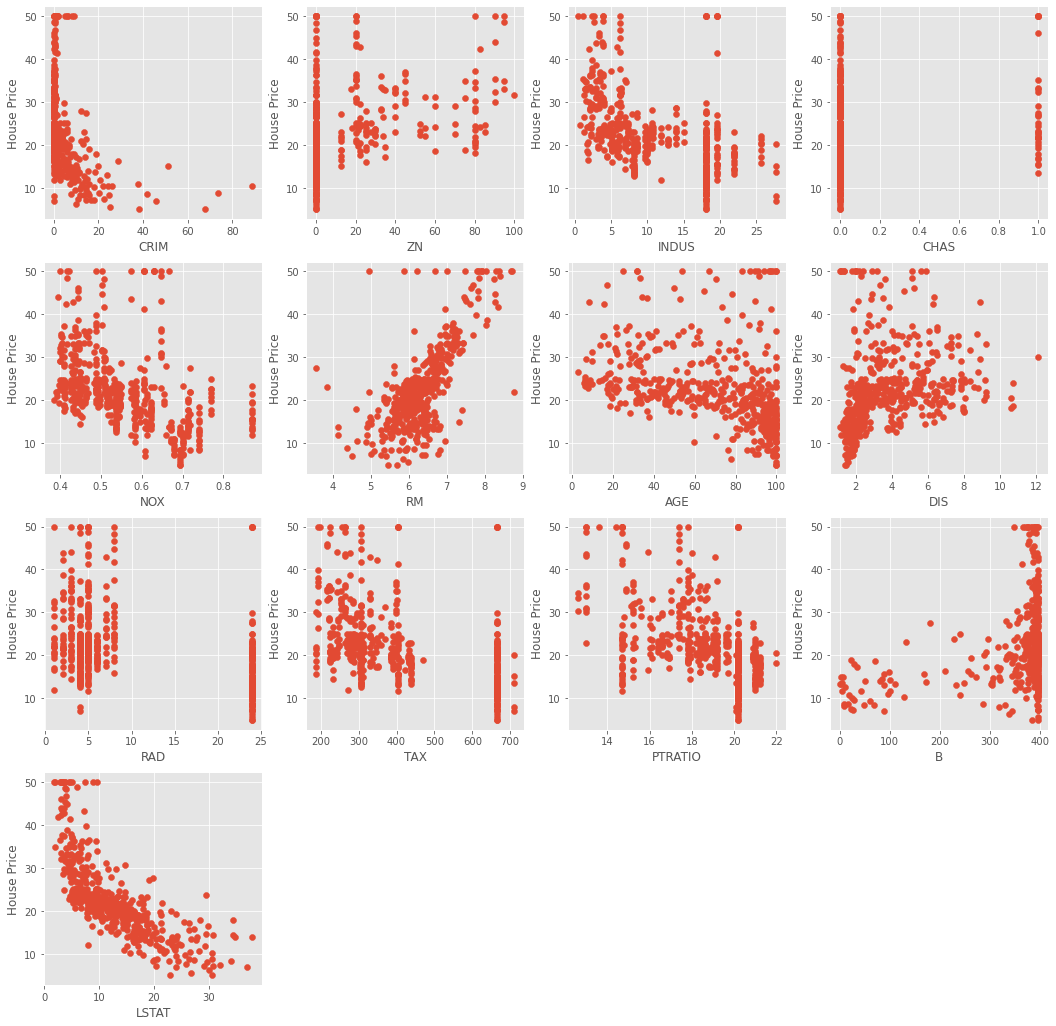

In [4]:
# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 
  
for index, feature_name in enumerate(boston_dataset.feature_names): 
    ax = fig.add_subplot(4, 4, index + 1) 
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target) 
    ax.set_ylabel('House Price', size = 12) 
    ax.set_xlabel(feature_name, size = 12) 
  
plt.show() 

### 4. Preprocesado de los datos

In [5]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 
  
# input  
X = boston_pd.iloc[:, :-1] 
  
#output 
Y = boston_pd.iloc[:, -1] 
  
print(boston_pd.head())

x_train, x_test, y_train, y_test = train_test_split( 
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],  
    test_size = 0.25) 
  
print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  
Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


### 5. Regresión lineal múltiple

In [7]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 
  
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
  
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 
  
# Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 

# Getting coefficients:
print(lreg_coefficient) 

Mean squared Error on test set :  27.920542201410615
    Columns  Coefficient Estimate
0      CRIM             -0.100927
1        ZN              0.034246
2     INDUS              0.034437
3      CHAS              3.520270
4       NOX            -18.198207
5        RM              3.184532
6       AGE              0.014000
7       DIS             -1.211948
8       RAD              0.260239
9       TAX             -0.009524
10  PTRATIO             -0.908247
11        B              0.009284
12    LSTAT             -0.584573


In [8]:
lreg_y_pred = lreg.predict(x_train) 
mean_squared_error = np.mean((lreg_y_pred - y_train)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

Mean squared Error on test set :  20.395095322203883


In [10]:
print("Coeficientes:", lreg.coef_)
print("Interceptor:", lreg.intercept_)

Coeficientes: [-1.00926788e-01  3.42459073e-02  3.44371896e-02  3.52027026e+00
 -1.81982065e+01  3.18453230e+00  1.40000005e-02 -1.21194807e+00
  2.60239343e-01 -9.52422918e-03 -9.08246811e-01  9.28353195e-03
 -5.84572834e-01]
Interceptor: 37.71731108090927


Pintamos los coeficientes para verlos mejor

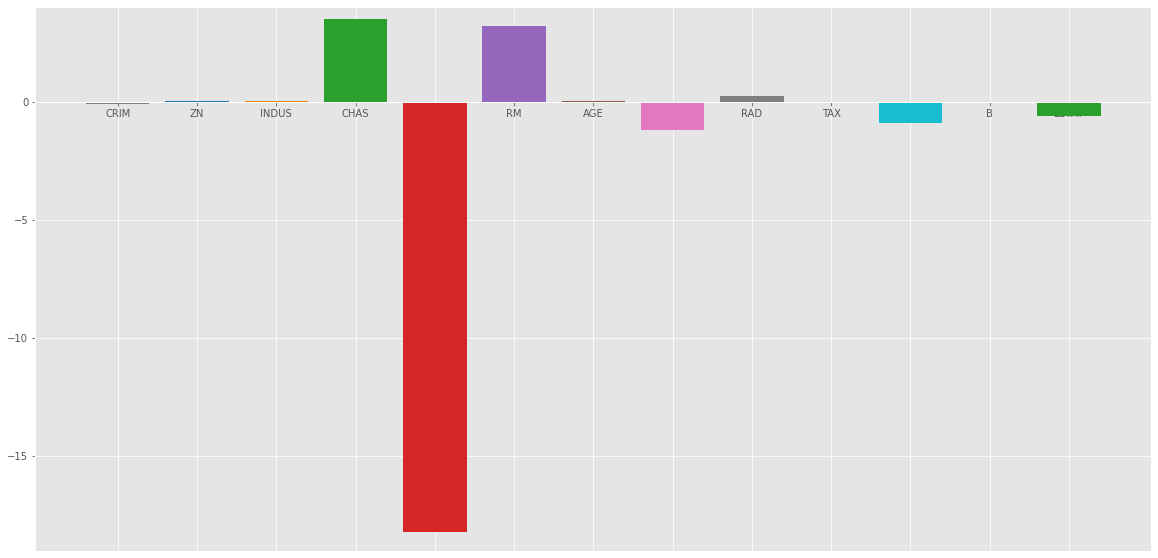

In [11]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lreg_coefficient["Columns"],  
lreg_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-19,4])
  
plt.style.use('ggplot');

### 6. Ridge regression

La regresión Ridge añade a la función de coste una penalización de regularización L2, lo que reduce los valores de los coeficientes drásticamente. No llega a eliminar estos coeficientes completamente, pero sí que permite medir el impacto de diferentes variables independientes:

In [12]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 
  
# Train the model  
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 
  
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 
  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

27.876059825543233
    Columns  Coefficient Estimate
0      CRIM             -0.100917
1        ZN              0.035796
2     INDUS             -0.000427
3      CHAS              3.324026
4       NOX             -9.944538
5        RM              3.299660
6       AGE              0.006493
7       DIS             -1.094203
8       RAD              0.253911
9       TAX             -0.010704
10  PTRATIO             -0.813951
11        B              0.010182
12    LSTAT             -0.587777


In [13]:
print("Coeficientes:", ridgeR.coef_)
print("Interceptor:", ridgeR.intercept_)

Coeficientes: [-1.00917498e-01  3.57957737e-02 -4.26722612e-04  3.32402567e+00
 -9.94453769e+00  3.29965962e+00  6.49256178e-03 -1.09420256e+00
  2.53910866e-01 -1.07044247e-02 -8.13950840e-01  1.01820511e-02
 -5.87776507e-01]
Interceptor: 31.386137962786027


Veamos en la gráfica cómo quedaría para alpha = 1

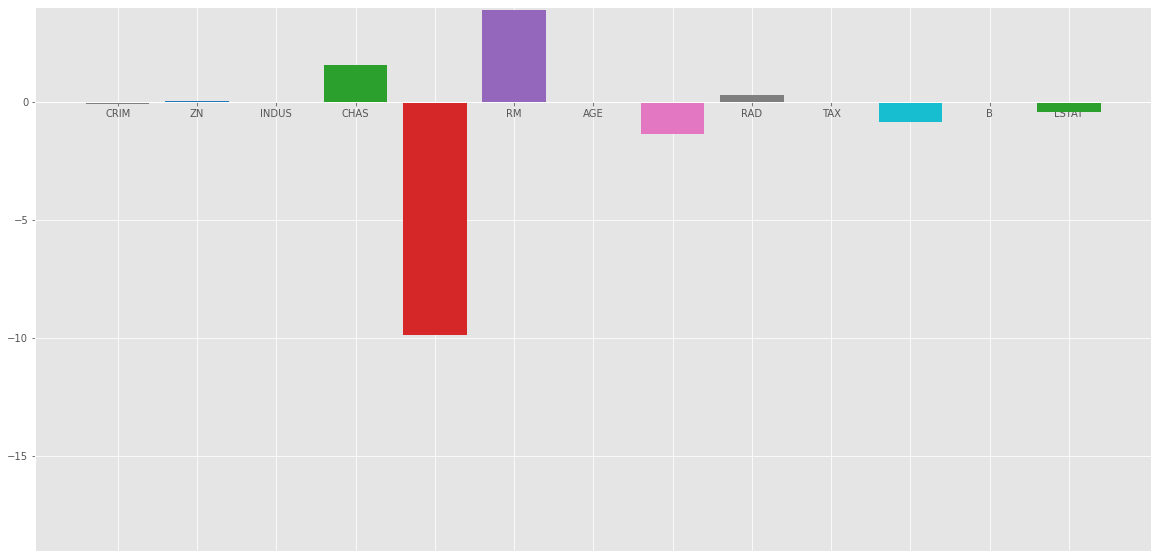

In [19]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(ridge_coefficient["Columns"],  
ridge_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-19,4])
  
plt.style.use('ggplot') 
plt.show() 

Si hacemos ahora alpha = 10

28.355017214316657
    Columns  Coefficient Estimate
0      CRIM             -0.102667
1        ZN              0.038388
2     INDUS             -0.034751
3      CHAS              2.390864
4       NOX             -1.971479
5        RM              3.139254
6       AGE              0.002255
7       DIS             -0.985738
8       RAD              0.261813
9       TAX             -0.012463
10  PTRATIO             -0.739128
11        B              0.010954
12    LSTAT             -0.612428


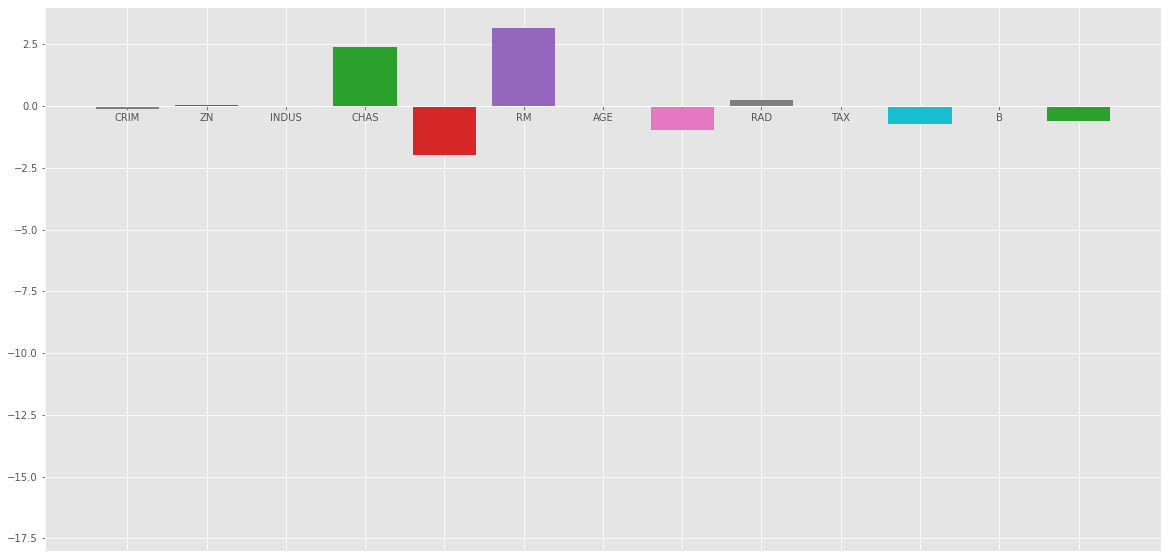

In [14]:
# Train the model  
ridgeR = Ridge(alpha = 10) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 
  
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 
  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(ridge_coefficient["Columns"],  
ridge_coefficient['Coefficient Estimate'], color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-18,4])
  
plt.style.use('ggplot') 
plt.show() 

### 7. Lasso regression

La regresión Lasso utiliza una penalización de regularización L1, lo cual no es que reduzca el valor de los coeficientes como la regresión Ridge, sino que llega a eliminar aquellos que tienen un impacto menor (si lo tienen) en la predicción. Se usa en algunos casos como selector de variables (feature selection), que será un tema que veremos en el futuro con un poco más de detalle.

Mean squared error on test set 28.28515826533748
    Columns  Coefficient Estimate
0      CRIM             -0.099211
1        ZN              0.037173
2     INDUS             -0.026908
3      CHAS              2.625347
4       NOX             -2.264708
5        RM              3.306734
6       AGE              0.001245
7       DIS             -0.962607
8       RAD              0.250190
9       TAX             -0.012051
10  PTRATIO             -0.725201
11        B              0.011024
12    LSTAT             -0.599844


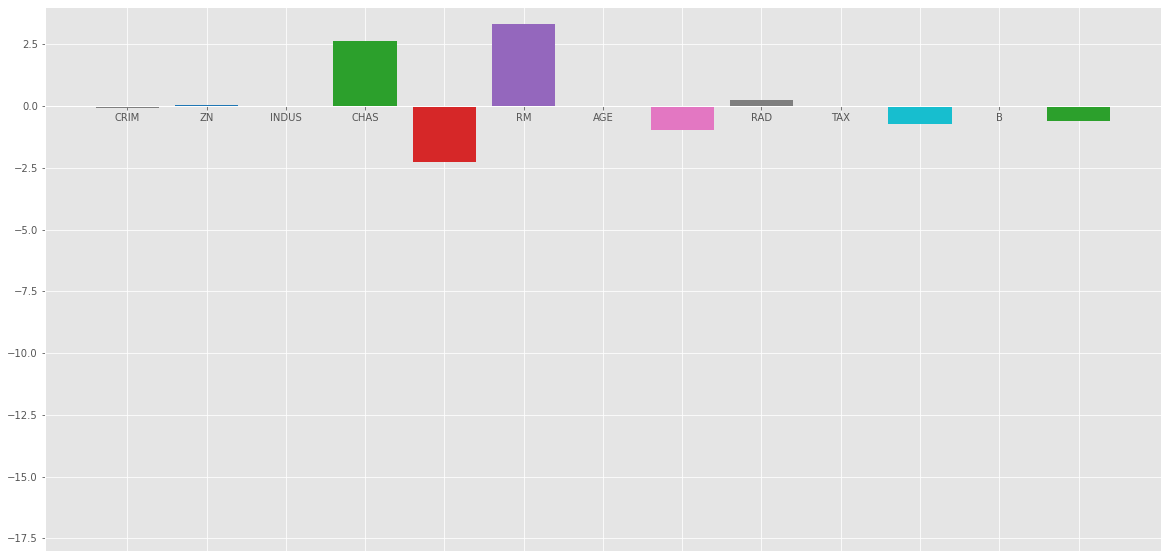

In [15]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 0.05) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-18,4])
  
plt.style.use('ggplot')

Mean squared error on test set 60.22754333517095
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.010008
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.000000
6       AGE              0.000000
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.007332
10  PTRATIO             -0.000000
11        B              0.008776
12    LSTAT             -0.555011


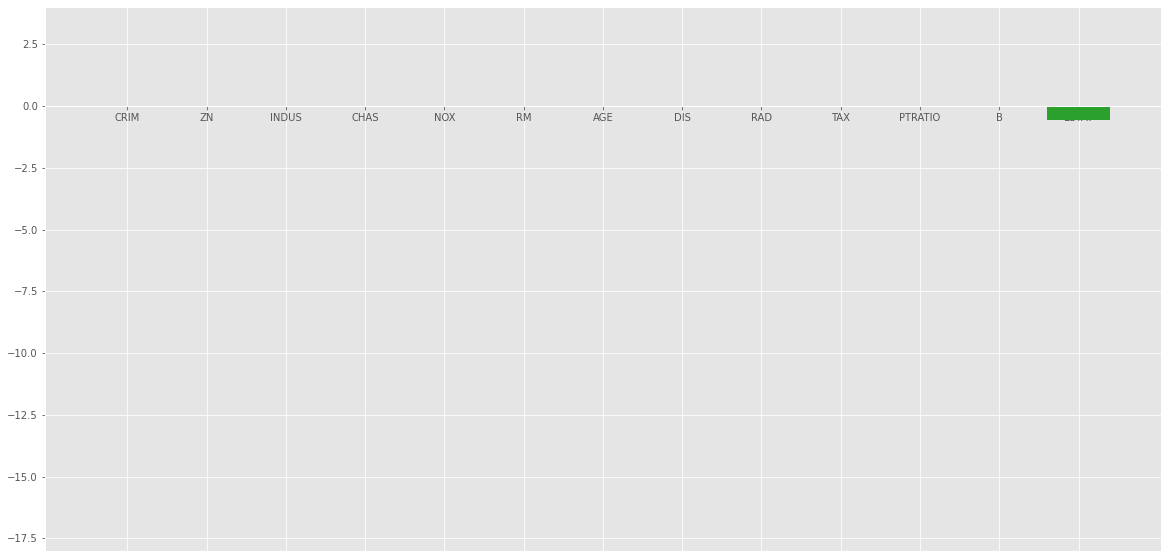

In [16]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 10) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18,4])
  
plt.style.use('ggplot')

### 8. Elastic Net

Elastic Net, por su parte, combina las 2 regularizaciones que hemos visto anteriormente: Ridge y Lasso. ¿Cómo lo hace? Pues añadiendo las dos penalizaciones que añaden cada una de ellas a su función de coste. En la mayoría de casos, gracias a esta combinación, funciona mejor que las ya mencionadas regresiones Ridge y Lasso:

Mean Squared Error on test set 40.026502244869754


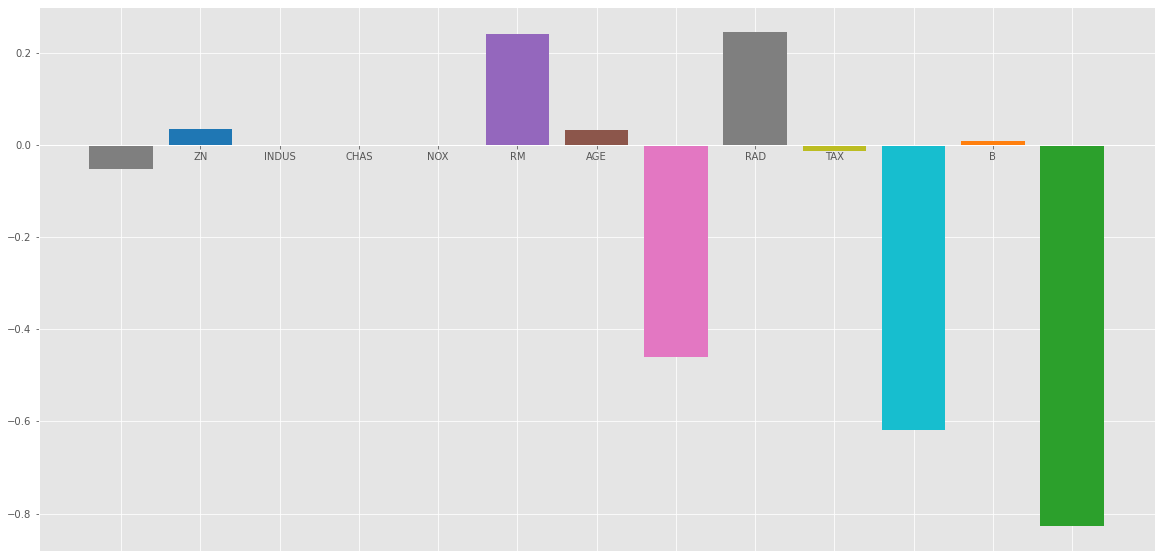

In [22]:
# import model 
from sklearn.linear_model import ElasticNet 
  
# Train the model 
e_net = ElasticNet(l1_ratio=0.9) 
e_net.fit(x_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(e_net_coeff["Columns"],  
e_net_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

<font color='red'>*¡Spoiler Alert!*</font>

Y para rematar... Tenemos la guida del pastel. No lo veremos aún pero es una de las cosas divertidas que haremos en el futuro: ¡¡GridSearch!! O lo que es lo mismo, dejar que la máquine pruebe valores por nosotros de forma iterativa para obtener los mejores resultados:

In [53]:
from sklearn.model_selection import GridSearchCV

# define model
model = ElasticNet()
# define model evaluation method

# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)

# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [379, 14622]

### EJERCICIO

1. Lee el dataframe de los futbolistas e intenta predecir el 'value_eur' con un algoritmo lineal
2. Ahora prueba con los 3 métodos que acabamos de ver, ¿con cuál obtienes mejor resultado? ¿Qué variables has utilizado? ¿Has convertido alguna categórica? Compara tus resultados con tus compañeros de clase.

EXTRA: ¿Recuerdas algún ejercicio donde hayas utilizado un regresor lineal y hayas tenido problemas de overfitting? Prueba a utilizar alguno de estos métodos y comprueba el resultado.

In [52]:
lista_errs = []

for i in y_test.index.tolist():
    try:
        X_test.iloc[i]
    except:
        print(i)
        lista_errs += [i]

4041
4050
4052
4078
4771
4762
4765
4079
4072
4775
4763
4759
4099
4065
4088
4757
4091
3671
3659
3669
4073
4106
4075
4104
4780
4135
4128
4023
4025
4097
3998
4167
4035
3964
3941
4203
4193
3905
4784
4198
4214
4114
4205
4159
4180
3940
3680
4786
3974
4223
4113
3828
3831
3889
4202
4782
3684
4150
4271
3657
4261
3773
4809
4801
4806
4118
3677
4220
3924
4794
4162
4820
3882
4831
4328
4787
4797
4024
4345
4824
4807
4860
4007
4834
3978
4206
4393
3763
4208
3809
4411
4401
4191
4236
4210
4843
4229
4283
4235
3925
4837
3842
3897
4375
4396
3992
4246
4232
4855
3877
4233
4822
3921
3954
4850
4317
4248
3960
4825
3950
4815
3878
3800
4277
4285
4899
3805
4316
4290
3829
4254
4962
3981
3790
3816
3732
4846
4636
4709
4373
3902
4335
4637
4943
3740
4744
4141
5020
4359
3668
4525
4879
4628
4693
4387
4928
5025
4644
4391
5024
4638
4745
4510
4504
4528
5028
4987
4948
4940
4362
4502
4632
4882
4188
4587
4653
4635
4029
4357
4867
4902
4523
5045
5671
4566
5123
5035
3876
5674
5677
4886
5060
4533
4991
5042
4645
4998
4931
5105
5011


Int64Index([ 5539, 16556, 13017, 17648, 14016,  7602,  7021, 13220, 12533,
             8497,
            ...
            12387, 15800, 14816,  4706,  2079,  4158,  9727,  5859,  6985,
            18243],
           dtype='int64', length=3656)


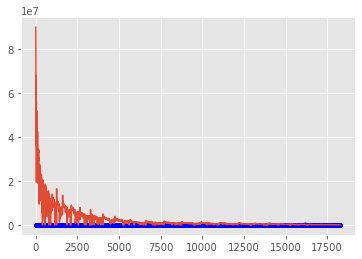

In [65]:
df = pd.read_csv("../../../data/FIFA20.csv")
df

X_cols = ['overall', 'potential', 'wage_eur']

X = df[X_cols]
y = df['value_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_reg = LinearRegression().fit(X_train, y_train)
preds = lin_reg.predict(X_test)
score = lin_reg.score(X_test, y_test)
y_test = y_test.sort_index(ascending=False)
print(X_test.index);
plt.plot(y_test.index, X_test.values, '.b')
plt.plot(y_test.index, y_test.values)